In [1]:
import os
os.chdir("src")
from env_predicter import Wrapper, NewArgs, BasicArgs, EnvApp, MarkovSampler
from models import DoubleQNET, Backbone
import torch
import torch.nn as nn
import numpy as np
from snake_game import SnakeGame, FrameStack
import gymnasium as gym
from gymnasium import spaces
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

In [4]:
device = "cpu"


agent_args = BasicArgs(
        n_envs=8,
        manhatten_fac=0,
        batch_size=32,
        min_eps=0.05,
        n_epoch_refil=1,
        n_obs_reward=3 + 1,
    device=device, )
random.seed(agent_args.seed)
np.random.seed(agent_args.seed)
torch.manual_seed(agent_args.seed)
                       
agent = DoubleQNET(agent_args)
agent.load_state_dict(torch.load("../best.ckpt", map_location=device))

args = NewArgs(run_name="test", m_width=32, device=device, data_points=1000)
env_model = EnvApp(args)
env_model.load_state_dict(torch.load("../models/env_sampler.ckpt", map_location = device)["state_dict"])

linear eps anneal


<All keys matched successfully>

In [7]:
sampler = MarkovSampler(agent=agent.model, env_model=env_model, device=device, agent_args=agent_args, max_depth=100) 
sampler.eval_env_model_performance(10000)

Evaluating Env Model performance: 100%|██████████| 100/100 [00:01<00:00, 56.95it/s]


(1.0, 1.0, tensor(1.), 14.0)

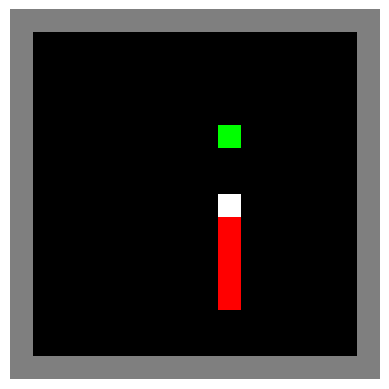

In [ ]:
env = SnakeGame(
    width=agent_args.width_and_height,
    height=agent_args.width_and_height,
    border=agent_args.border,
    food_amount=1,
    render_mode="human",
    manhatten_fac=0,
    mode="eval",
    seed = 1000
)

env = FrameStack(env)
obs = env.reset()[0]
env.render()

Evaling Agent

In [16]:
N_STEPS = 10000
MAX_DEPTH = 10

sampler = MarkovSampler(agent=agent.model, env_model=env_model, device=device, agent_args=agent_args, max_depth=MAX_DEPTH) 


scores = []
lengths = []

step = 0
score = 0

obs = env.reset()[0]

for _ in tqdm(range(N_STEPS)):
    
    action = sampler.greedy_agent_action(obs[None,:])[0]
    
    obs, reward, done, truncated, info = env.step(action)
    
    score += reward
    step += 1
    
    if done:
        scores.append(score)
        lengths.append(step)

        score = 0
        step = 0
        obs = env.reset()[0]
        
np.mean(scores), np.mean(lengths)

100%|██████████| 10000/10000 [00:38<00:00, 262.73it/s]


(30.392857142857142, 354.07142857142856)

In [17]:
N_STEPS = 10000

scores = []
lengths = []

step = 0
score = 0

obs = env.reset()[0]

for _ in tqdm(range(N_STEPS)):
    
    action = sampler.greedy_search(obs)
    
    obs, reward, done, truncated, info = env.step(action)
    
    score += reward
    step += 1
    
    if done:
        scores.append(score)
        lengths.append(step)

        score = 0
        step = 0
        obs = env.reset()[0]
        
np.mean(scores), np.mean(lengths)

  0%|          | 12/10000 [03:06<42:17:18, 15.24s/it]